In [ ]:
                                                                ASSIGNMENT-1

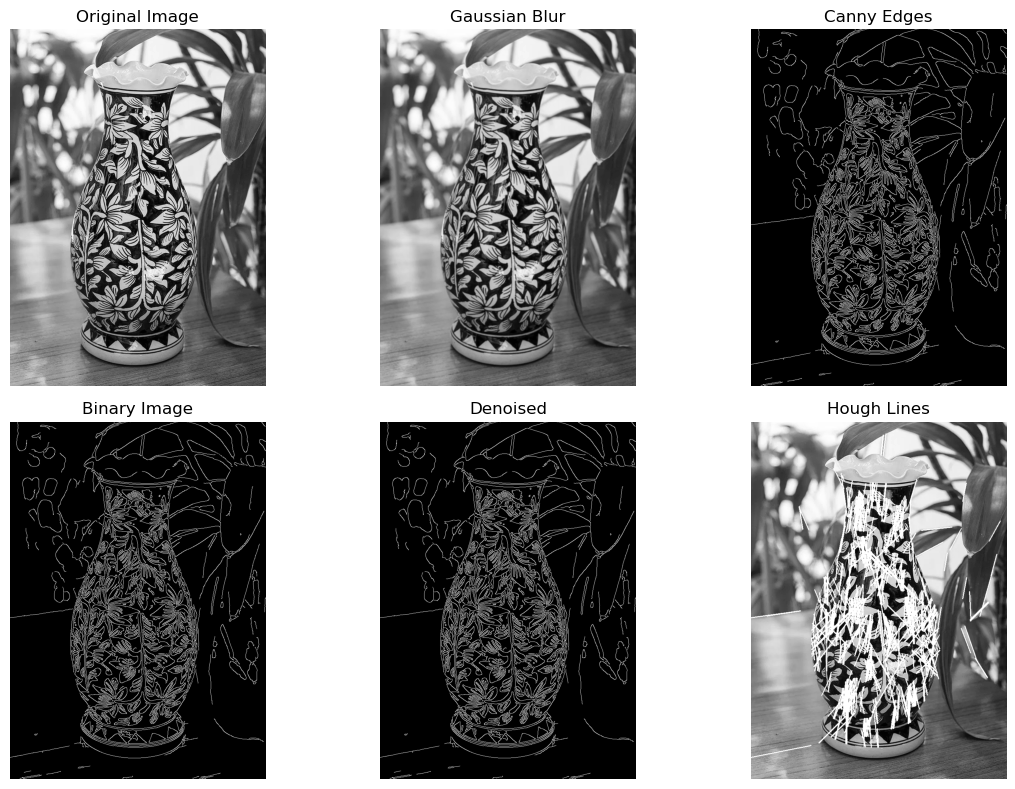

In [1]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading image
image = cv2.imread(r"C:\Users\yamun\Downloads\assi1.png", cv2.IMREAD_GRAYSCALE)

# Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Convert to Binary
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Preprocessing (Additional denoising)
denoised = cv2.fastNlMeansDenoising(binary_image, h=30)

# Hough Transform
lines = cv2.HoughLinesP(denoised, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw the detected lines on the image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# results
titles = ['Original Image', 'Gaussian Blur', 'Canny Edges', 'Binary Image', 'Denoised', 'Hough Lines']
images = [image, blurred, edges, binary_image, denoised, line_image]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()